In [1]:
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

### L variation - Last epoch analysis

In [2]:
test_errors = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/test_errors/**')
pacbayes_flatness = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/pacbayes_flatness/**')
pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/pacbayes_mag_flatness/**')

In [3]:
def create_dict(files_list):
    """
    For each dataframe on the files_list, get the value on column 1
    for the last trained epoch.
    """
    values = dict()
    for file in files_list:
        df = pd.read_csv(file)
        value = df.iloc[-1, 1]
        column = df.columns[1]
        values[column] = value
    return values

In [4]:
def associate_right_value(L_order, current_dict, tags):
    right_value = dict()
    
    for l, tag in zip(L_order, tags):
        right_value[str(l)] = current_dict[tag]
    
    return right_value

In [5]:
test_dict = create_dict(test_errors)
pb_f = create_dict(pacbayes_flatness)
pb_mf = create_dict(pacbayes_mag_flatness)

In [6]:
# Tags defined on WANDB
test_tags = ['SGD, s=51, lr_decay - percentage_errors/test',
             'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - percentage_errors/test']

pb_tags = ['SGD, s=51, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
            'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS']

pb_mf_tags = ['SGD, s=51, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
              'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
              'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
              'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS']

# Current L variations on the order defined by the tags
L = [0, 5, 10, 20, 25]

test_values = associate_right_value(L, test_dict, test_tags)
pb_values = associate_right_value(L, pb_f, pb_tags)
pb_mf_values = associate_right_value(L, pb_mf, pb_mf_tags)

Text(0, 0.5, 'Test errors (%)')

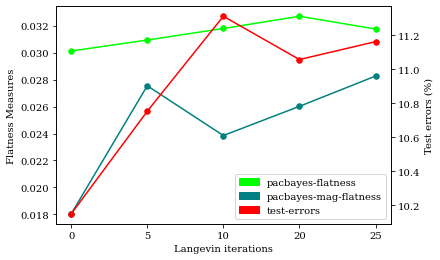

In [7]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "12"
patches = []

fig, axs = plt.subplots()
axs.plot(pb_values.keys(), pb_values.values(), 'lime')
axs.scatter(pb_values.keys(), pb_values.values(), s=30, color='lime')
patch = mpatches.Patch(color='lime', label='pacbayes-flatness')
patches.append(patch)

axs.plot(pb_mf_values.keys(), pb_mf_values.values(), 'teal')
axs.scatter(pb_mf_values.keys(), pb_mf_values.values(), s=30, color='teal')
patch = mpatches.Patch(color='teal', label='pacbayes-mag-flatness')
patches.append(patch)

ax2 = axs.twinx()
ax2.plot(test_values.keys(), test_values.values(), 'red')
ax2.scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)
plt.legend(handles=patches)

axs.set_xlabel('Langevin iterations')
axs.set_ylabel('Flatness Measures')
ax2.set_ylabel('Test errors (%)')

### Gamma variation - Last epoch analysis

In [8]:
test_errors = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/test_errors/**')
pacbayes_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_flatness/**')
pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_mag_flatness/**')

In [9]:
test_dict = create_dict(test_errors)
pb_f = create_dict(pacbayes_flatness)
pb_mf = create_dict(pacbayes_mag_flatness)

In [10]:
# Tags defined on WANDB
test_tags = ['Entropy SGD, L=20, s=51, gamma=3, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.3, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - percentage_errors/test',
            'Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - percentage_errors/test']

pb_tags = ['Entropy SGD, L=20, s=51, gamma=3, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.3, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - complexity/PACBAYES_FLATNESS',
          'Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - complexity/PACBAYES_FLATNESS']

pb_mf_tags = ['Entropy SGD, L=20, s=51, gamma=3, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.3, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - complexity/PACBAYES_MAG_FLATNESS',
             'Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - complexity/PACBAYES_MAG_FLATNESS']

Gamma = ['3e-5', '3e-4', '3e-3', '3e-2', '3e-1', '3']

test_values = associate_right_value(Gamma, test_dict, list(reversed(test_tags)))
pb_values = associate_right_value(Gamma, pb_f, list(reversed(pb_tags)))
pb_mf_values = associate_right_value(Gamma, pb_mf, list(reversed(pb_mf_tags)))

Text(0, 0.5, 'Test errors (%)')

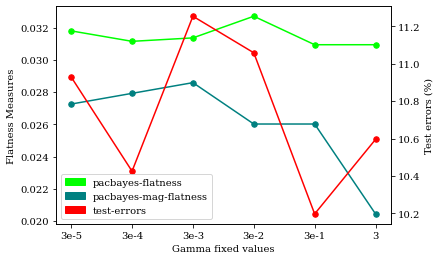

In [11]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "10"
patches = []

fig, axs = plt.subplots()
axs.plot(pb_values.keys(), pb_values.values(), 'lime')
axs.scatter(pb_values.keys(), pb_values.values(), s=30, color='lime')
patch = mpatches.Patch(color='lime', label='pacbayes-flatness')
patches.append(patch)

axs.plot(pb_mf_values.keys(), pb_mf_values.values(), 'teal')
axs.scatter(pb_mf_values.keys(), pb_mf_values.values(), s=30, color='teal')
patch = mpatches.Patch(color='teal', label='pacbayes-mag-flatness')
patches.append(patch)

ax2 = axs.twinx()
ax2.plot(test_values.keys(), test_values.values(), 'red')
ax2.scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)
plt.legend(handles=patches)

axs.set_xlabel('Gamma fixed values')
axs.set_ylabel('Flatness Measures')
ax2.set_ylabel('Test errors (%)')

### Scoping analysis

In [12]:
test_errors = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/test_errors/**')
pacbayes_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_flatness/**')
pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay/pacbayes_mag_flatness/**')

scoping_test_errors = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay_scoping/test_errors/**')
scoping_pacbayes_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay_scoping/pacbayes_flatness/**')
scoping_pacbayes_mag_flatness = glob.glob('../WANDB_RESULTS/Gammavariation_seed51_L20_lrdecay_scoping/pacbayes_mag_flatness/**')

In [13]:
test_dict = create_dict(test_errors)
test_dict_scoping = create_dict(scoping_test_errors)
pb_f = create_dict(pacbayes_flatness)
pb_f_scoping = create_dict(scoping_pacbayes_flatness)

In [14]:
test = ['Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - percentage_errors/test',
        'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - percentage_errors/test',
        'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - percentage_errors/test',
        'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test']

test_scoping = ['Entropy SGD, L=20, s=51, gamma=0.00003, scoping, lr_decay - percentage_errors/test',
                'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay, scoping - percentage_errors/test',
                'Entropy SGD, L=20, s=51, gamma=0.003, scoping, lr_decay - percentage_errors/test',
                'Entropy SGD, L=20, s=51, gamma=0.03, scoping, lr_decay - percentage_errors/test']

pb_flatness = ['Entropy SGD, L=20, s=51, gamma=0.00003, lr_decay - complexity/PACBAYES_FLATNESS',
               'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay - complexity/PACBAYES_FLATNESS',
               'Entropy SGD, L=20, s=51, gamma=0.003, lr_decay - complexity/PACBAYES_FLATNESS',
               'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - complexity/PACBAYES_FLATNESS']
              

pb_flatness_scoping = ['Entropy SGD, L=20, s=51, gamma=0.00003, scoping, lr_decay - complexity/PACBAYES_FLATNESS',
                        'Entropy SGD, L=20, s=51, gamma=0.0003, lr_decay, scoping - complexity/PACBAYES_FLATNESS',
                        'Entropy SGD, L=20, s=51, gamma=0.003, scoping, lr_decay - complexity/PACBAYES_FLATNESS',
                        'Entropy SGD, L=20, s=51, gamma=0.03, scoping, lr_decay - complexity/PACBAYES_FLATNESS']

In [15]:
Gamma = ['3e-5', '3e-4', '3e-3', '3e-2']

test_values = associate_right_value(Gamma, test_dict, test)
test_values_scoping = associate_right_value(Gamma, test_dict_scoping, test_scoping)

pb_values = associate_right_value(Gamma, pb_f, pb_flatness)
scoping_pb_values = associate_right_value(Gamma, pb_f_scoping, pb_flatness_scoping)

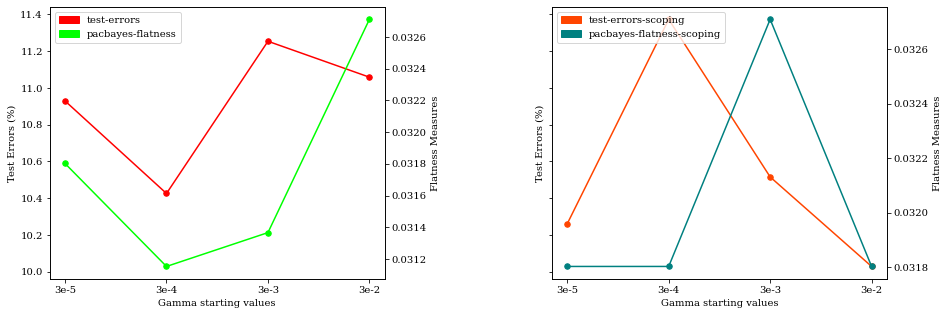

In [16]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "10"
patches = []

fig, axs = plt.subplots(1, 2, figsize=(15, 5) , sharey=True)

axs[0].plot(test_values.keys(), test_values.values(), 'red')
axs[0].scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)

ax2 = axs[0].twinx()
ax2.plot(pb_values.keys(), pb_values.values(), 'lime')
ax2.scatter(pb_values.keys(), pb_values.values(), s=30, color='lime')
patch = mpatches.Patch(color='lime', label='pacbayes-flatness')
patches.append(patch)

axs[0].set_xlabel('Gamma starting values')
axs[0].set_ylabel('Test Errors (%)')
ax2.set_ylabel('Flatness Measures')
plt.legend(handles=patches)

patches = []

axs[1].plot(test_values_scoping.keys(), test_values_scoping.values(), 'orangered')
axs[1].scatter(test_values_scoping.keys(), test_values_scoping.values(), s=30, color='orangered')
patch = mpatches.Patch(color='orangered', label='test-errors-scoping')
patches.append(patch)

ax2 = axs[1].twinx()
ax2.plot(scoping_pb_values.keys(), scoping_pb_values.values(), 'teal')
ax2.scatter(scoping_pb_values.keys(), scoping_pb_values.values(), s=30, color='teal')
patch = mpatches.Patch(color='teal', label='pacbayes-flatness-scoping')
patches.append(patch)
plt.legend(handles=patches)

axs[1].set_xlabel('Gamma starting values')
axs[1].set_ylabel('Test Errors (%)')
ax2.set_ylabel('Flatness Measures')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

### LR decay analysis

In [17]:
test_errors_decay = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03_lrdecay/test_errors/**')
test_errors_nodecay = glob.glob('../WANDB_RESULTS/Lvariation_seed51_gamma0.03/test_errors/**')

In [18]:
test_tags = ['SGD, s=51, lr_decay - percentage_errors/test',
             'Entropy SGD, L=5, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=10, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=20, s=51, gamma=0.03, lr_decay - percentage_errors/test',
             'Entropy SGD, L=25, s=51, gamma=0.03, lr_decay - percentage_errors/test']

test_tags_nodecay = ['ENTROPY SGD, L=0,  SEED 51 - percentage_errors/test',
    'Entropy-SGD, L=5, E=40, SEED=51 - percentage_errors/test',
    'Entropy-SGD L=10, E=20, SEED=51 - percentage_errors/test',
    'Entropy SGD - L=20, E=10, SEED=51 - percentage_errors/test',
    'Entropy-SGD L=25, E=8, SEED=51 - percentage_errors/test']

L = [0, 5, 10, 20, 25]

test_dict = create_dict(test_errors_decay)
test_dict_no_decay = create_dict(test_errors_nodecay)
test_values = associate_right_value(L, test_dict, test_tags)
test_values_decay = associate_right_value(L, test_dict_no_decay, test_tags_nodecay)

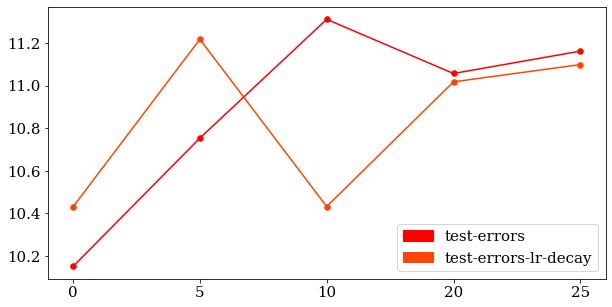

In [19]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "15"
patches = []

fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(test_values.keys(), test_values.values(), 'red')
axs.scatter(test_values.keys(), test_values.values(), s=30, color='red')
patch = mpatches.Patch(color='red', label='test-errors')
patches.append(patch)

axs.plot(test_values_decay.keys(), test_values_decay.values(), 'orangered')
axs.scatter(test_values_decay.keys(), test_values_decay.values(), s=30, color='orangered')
patch = mpatches.Patch(color='orangered', label='test-errors-lr-decay')
patches.append(patch)
plt.legend(handles=patches)

## Seeds analysis

### 1. Train x Test errors

In [58]:
def get_mean_std(path, size):
    files = glob.glob(path)
    array = np.array([])
    for file in files:
        new_array = pd.read_csv(file).iloc[:, 1].values.reshape(1, size)
        if len(array) == 0:
            array = new_array
        else:
            array = np.concatenate((array, new_array), axis=0)
    
    return np.mean(array, axis=0), np.std(array, axis=0)

In [59]:
def plot_sgd_against_entropy(sgd_mean,
                             sgd_std,
                             sgd_mean_2,
                             sgd_std_2,
                             entropy_mean,
                             entropy_std,
                             entropy_mean_2,
                             entropy_std_2,
                             label,
                             label_2,
                             ylabel,
                             ylabel_2,
                             sgd_epochs,
                             langevin):
    
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.size"] = "15"
    patches = []

    fig, axs = plt.subplots(1, 2, figsize=(15, 5) , sharey=True)

    axs[0].plot(np.arange(1, sgd_epochs + 1), sgd_mean, 'black')
    axs[0].fill_between(np.arange(1, sgd_epochs + 1),
                        sgd_mean - sgd_std,
                        sgd_mean + sgd_std,
                        color='black',
                        alpha=0.5)
    patch = mpatches.Patch(color='black', label=label)
    patches.append(patch)

    axs[0].plot(np.arange(langevin, sgd_epochs + langevin, langevin),
                entropy_train_array_mean, 'red')
    axs[0].scatter(np.arange(langevin, sgd_epochs + langevin, langevin),
                   entropy_train_array_mean, color='red', s=30)
    axs[0].fill_between(np.arange(langevin, sgd_epochs + langevin, langevin),
                        entropy_mean - entropy_std,
                        entropy_mean + entropy_std,
                        color='red',
                        alpha=0.3)
    patch = mpatches.Patch(color='red', label=label_2)
    patches.append(patch)
    axs[0].legend(handles=patches)

    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel(ylabel)
    axs[0].set_ylim([5, 20])

    patches = []

    axs[1].plot(np.arange(1, sgd_epochs + 1), sgd_mean_2, 'black')
    axs[1].fill_between(np.arange(1, sgd_epochs + 1),
                        sgd_mean_2 - sgd_std_2,
                        sgd_mean_2 + sgd_std_2,
                        color='black',
                        alpha=0.5)
    patch = mpatches.Patch(color='black', label=label)
    patches.append(patch)

    axs[1].plot(np.arange(langevin,
                          sgd_epochs + langevin,
                          langevin),
                          entropy_mean_2, 'red')
    axs[1].scatter(np.arange(langevin, sgd_epochs + langevin, langevin),
                   entropy_mean_2, color='red', s=30)
    axs[1].fill_between(np.arange(langevin, sgd_epochs + langevin, langevin),
                        entropy_mean_2 - entropy_std_2, entropy_mean_2 + entropy_std_2,
                        color='red', alpha=0.3)
    patch = mpatches.Patch(color='red', label=label_2)
    patches.append(patch)
    axs[1].legend(handles=patches)

    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel(ylabel_2)
    axs[1].set_ylim([5, 20])

In [60]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
sgd_mean_2, sgd_std_2 = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)
entropy_mean_2, entropy_std_2 = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

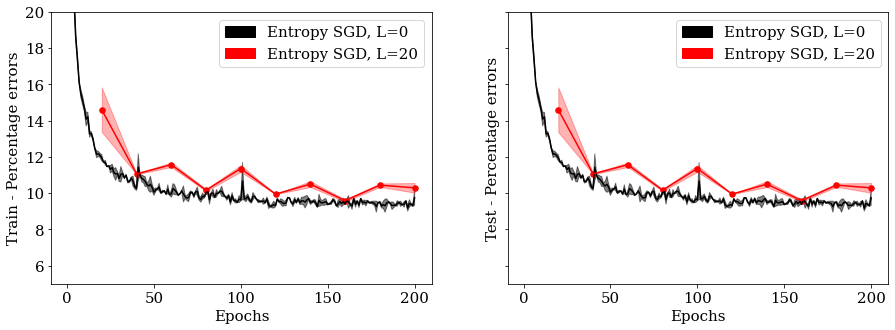

In [61]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         sgd_mean_2,
                         sgd_std_2,
                         entropy_mean,
                         entropy_std,
                         entropy_mean_2,
                         entropy_std_2,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20',
                         'Train - Percentage errors',
                         'Test - Percentage errors',
                         200,
                         20)

###  2. Pacbayes Flatness and pacbayes mag flatness

In [62]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
sgd_mean_2, sgd_std_2 = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)
entropy_mean_2, entropy_std_2 = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

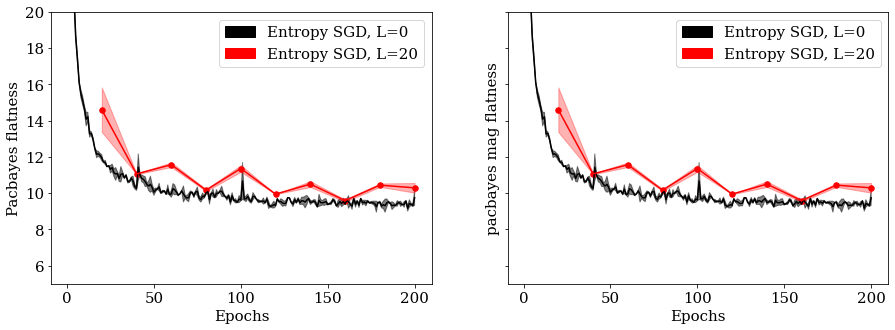

In [63]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         sgd_mean_2,
                         sgd_std_2,
                         entropy_mean,
                         entropy_std,
                         entropy_mean_2,
                         entropy_std_2,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20',
                         'Pacbayes flatness',
                         'pacbayes mag flatness',
                         200,
                         20)

### 3. Pacbayes init e pacbayes  mag init

In [62]:
sgd_mean, sgd_std = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
sgd_mean_2, sgd_std_2 = get_mean_std('../WANDB_RESULTS/Final_SGD_seeds/test_errors/**', 200)
entropy_mean, entropy_std = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)
entropy_mean_2, entropy_std_2 = get_mean_std('../WANDB_RESULTS/Final_Entropy_seeds/test_errors/**', 10)

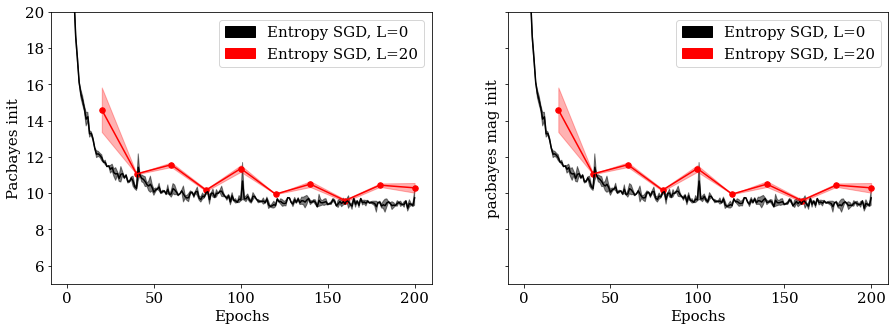

In [64]:
plot_sgd_against_entropy(sgd_mean,
                         sgd_std,
                         sgd_mean_2,
                         sgd_std_2,
                         entropy_mean,
                         entropy_std,
                         entropy_mean_2,
                         entropy_std_2,
                         'Entropy SGD, L=0',
                         'Entropy SGD, L=20',
                         'Pacbayes init',
                         'pacbayes mag init',
                         200,
                         20)